# Оператор Собеля

In [1]:
import cv2
import numpy as np

In [4]:
img = cv2.imread('lena.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # covertazija v chjorno - belqj

In [5]:
img.dtype # uint8 - bezznakovqj chelochislennqj format 

dtype('uint8')

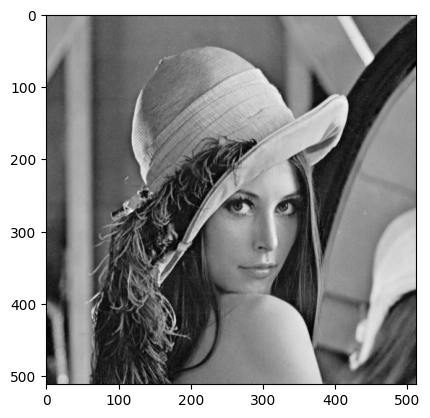

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img_gray, cmap='gray')

## Оператор собеля для вычисления X и Y составляющих градиента

In [10]:
sobel_x = np.array([[-1, 0, 1], # vertikalnqij operator
                    [-2, 0, 2],
                    [-1, 0, 1]])
    
sobel_y = np.array([[-1, -2, -1], # gorizontalnqj operator
                    [ 0,  0,  0],
                    [ 1,  2,  1]])

## Вычисляем градиенты по осям

In [12]:
grad_x = cv2.filter2D(img_gray, cv2.CV_32F, sobel_x) # primenim operator k izorazeniju, vmesto UNT8 ->  cv2.CV_32F
grad_y = cv2.filter2D(img_gray, cv2.CV_32F, sobel_y)

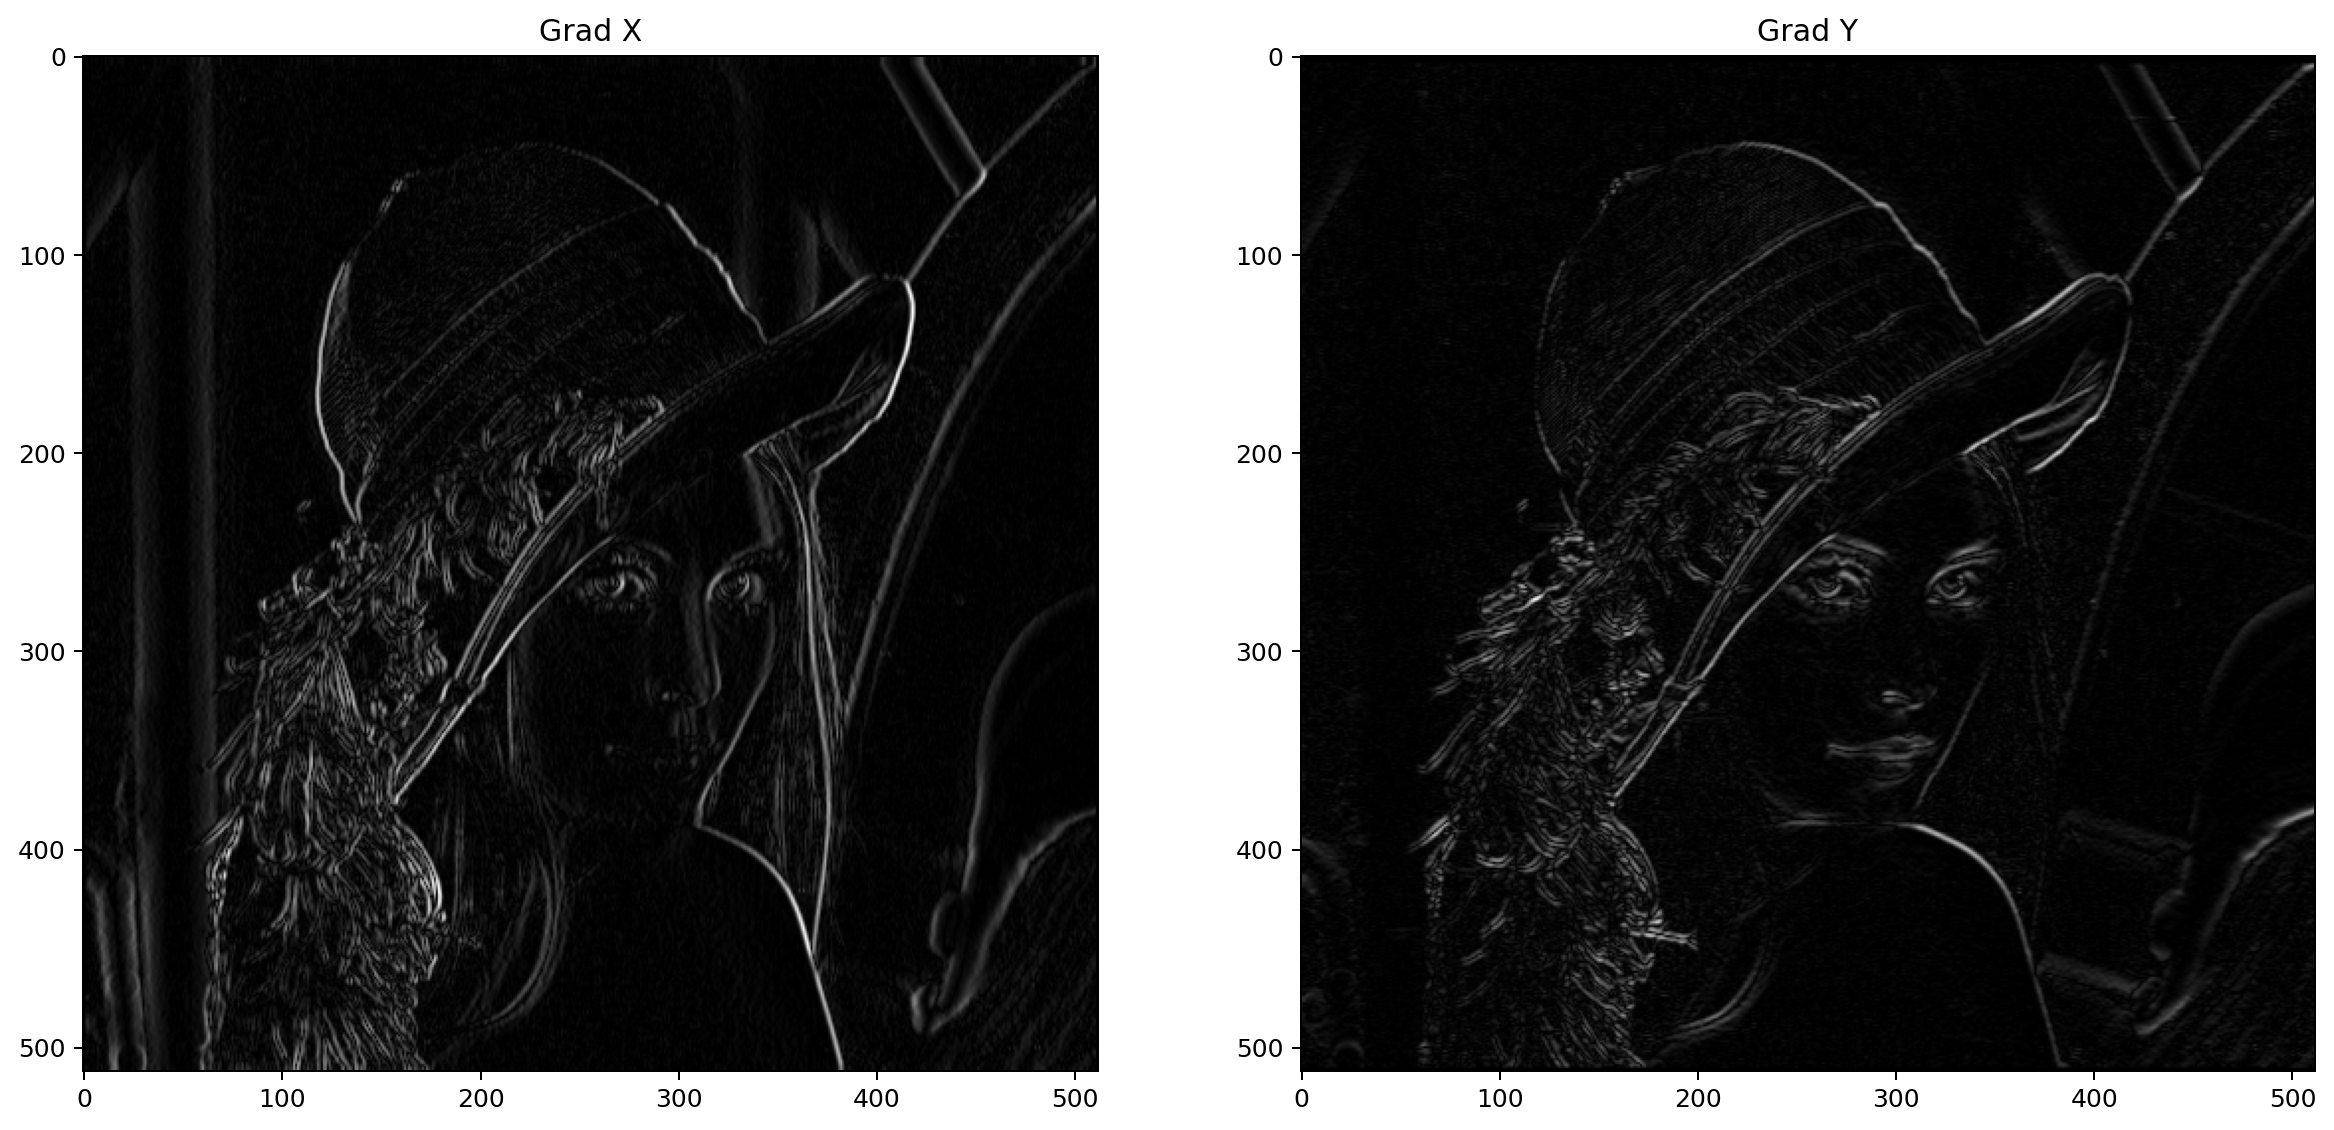

In [14]:
plt.figure(2, figsize=(16, 12), dpi=180)
plt.subplot(121)
plt.imshow(np.abs(grad_x)/np.max(np.abs(grad_x)), cmap='gray') # nahodim modul i delim na normirovku
plt.title('Grad X')
plt.subplot(122)
plt.imshow(np.abs(grad_y)/np.max(np.abs(grad_y)), cmap='gray')
plt.title('Grad Y');

## Вычисляем суммарный градиент

In [15]:
grad = np.sqrt(grad_x ** 2 + grad_y ** 2)
theta = np.arctan2(grad_y, grad_x)

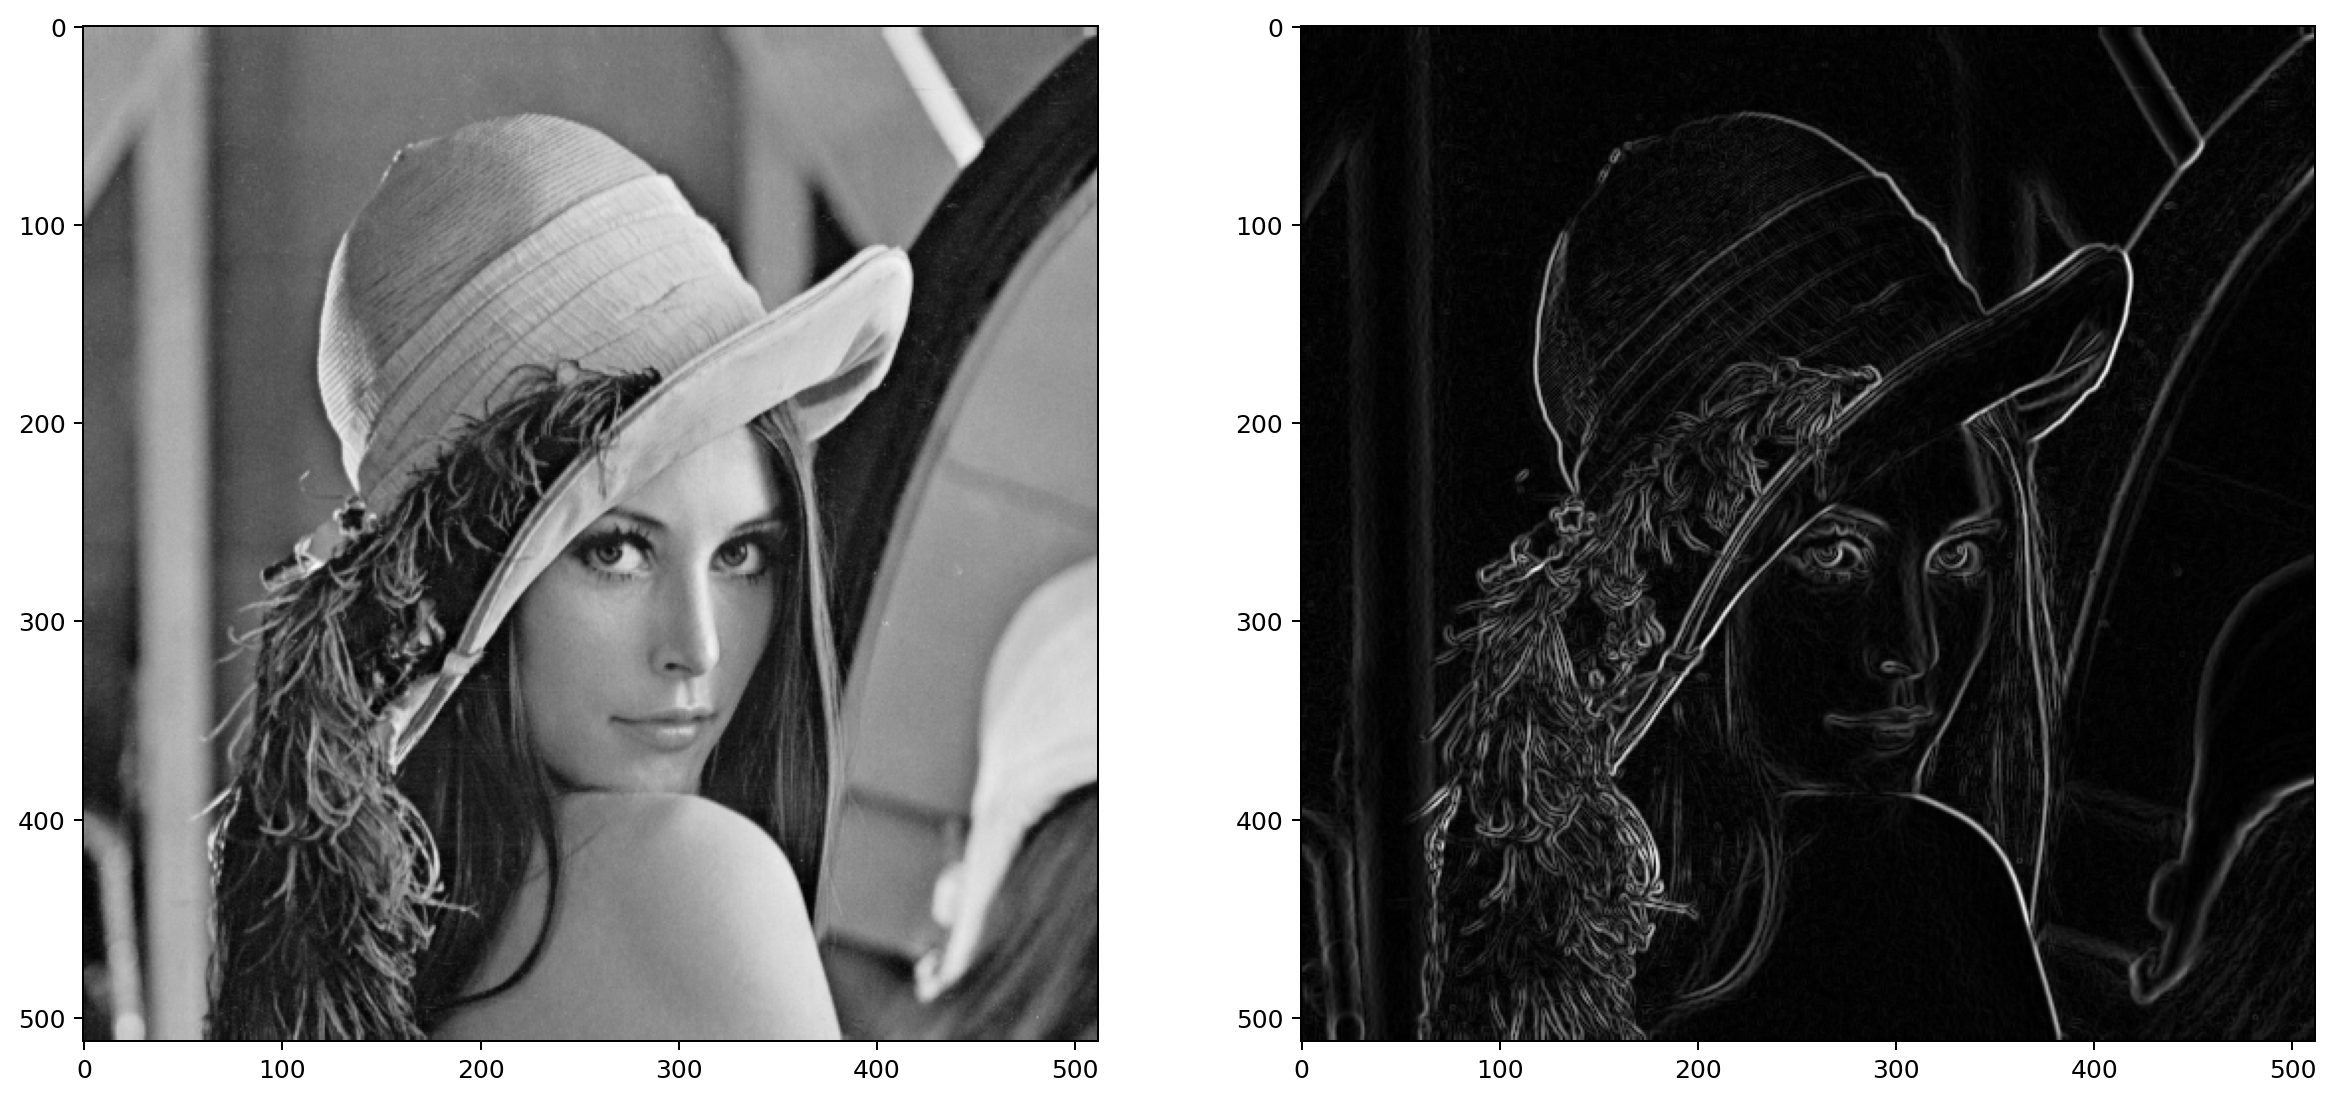

In [16]:
plt.figure(2, figsize=(16, 12), dpi=180)
plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.subplot(122)
plt.imshow(grad, cmap='gray')

## Визуализируем направление градиента

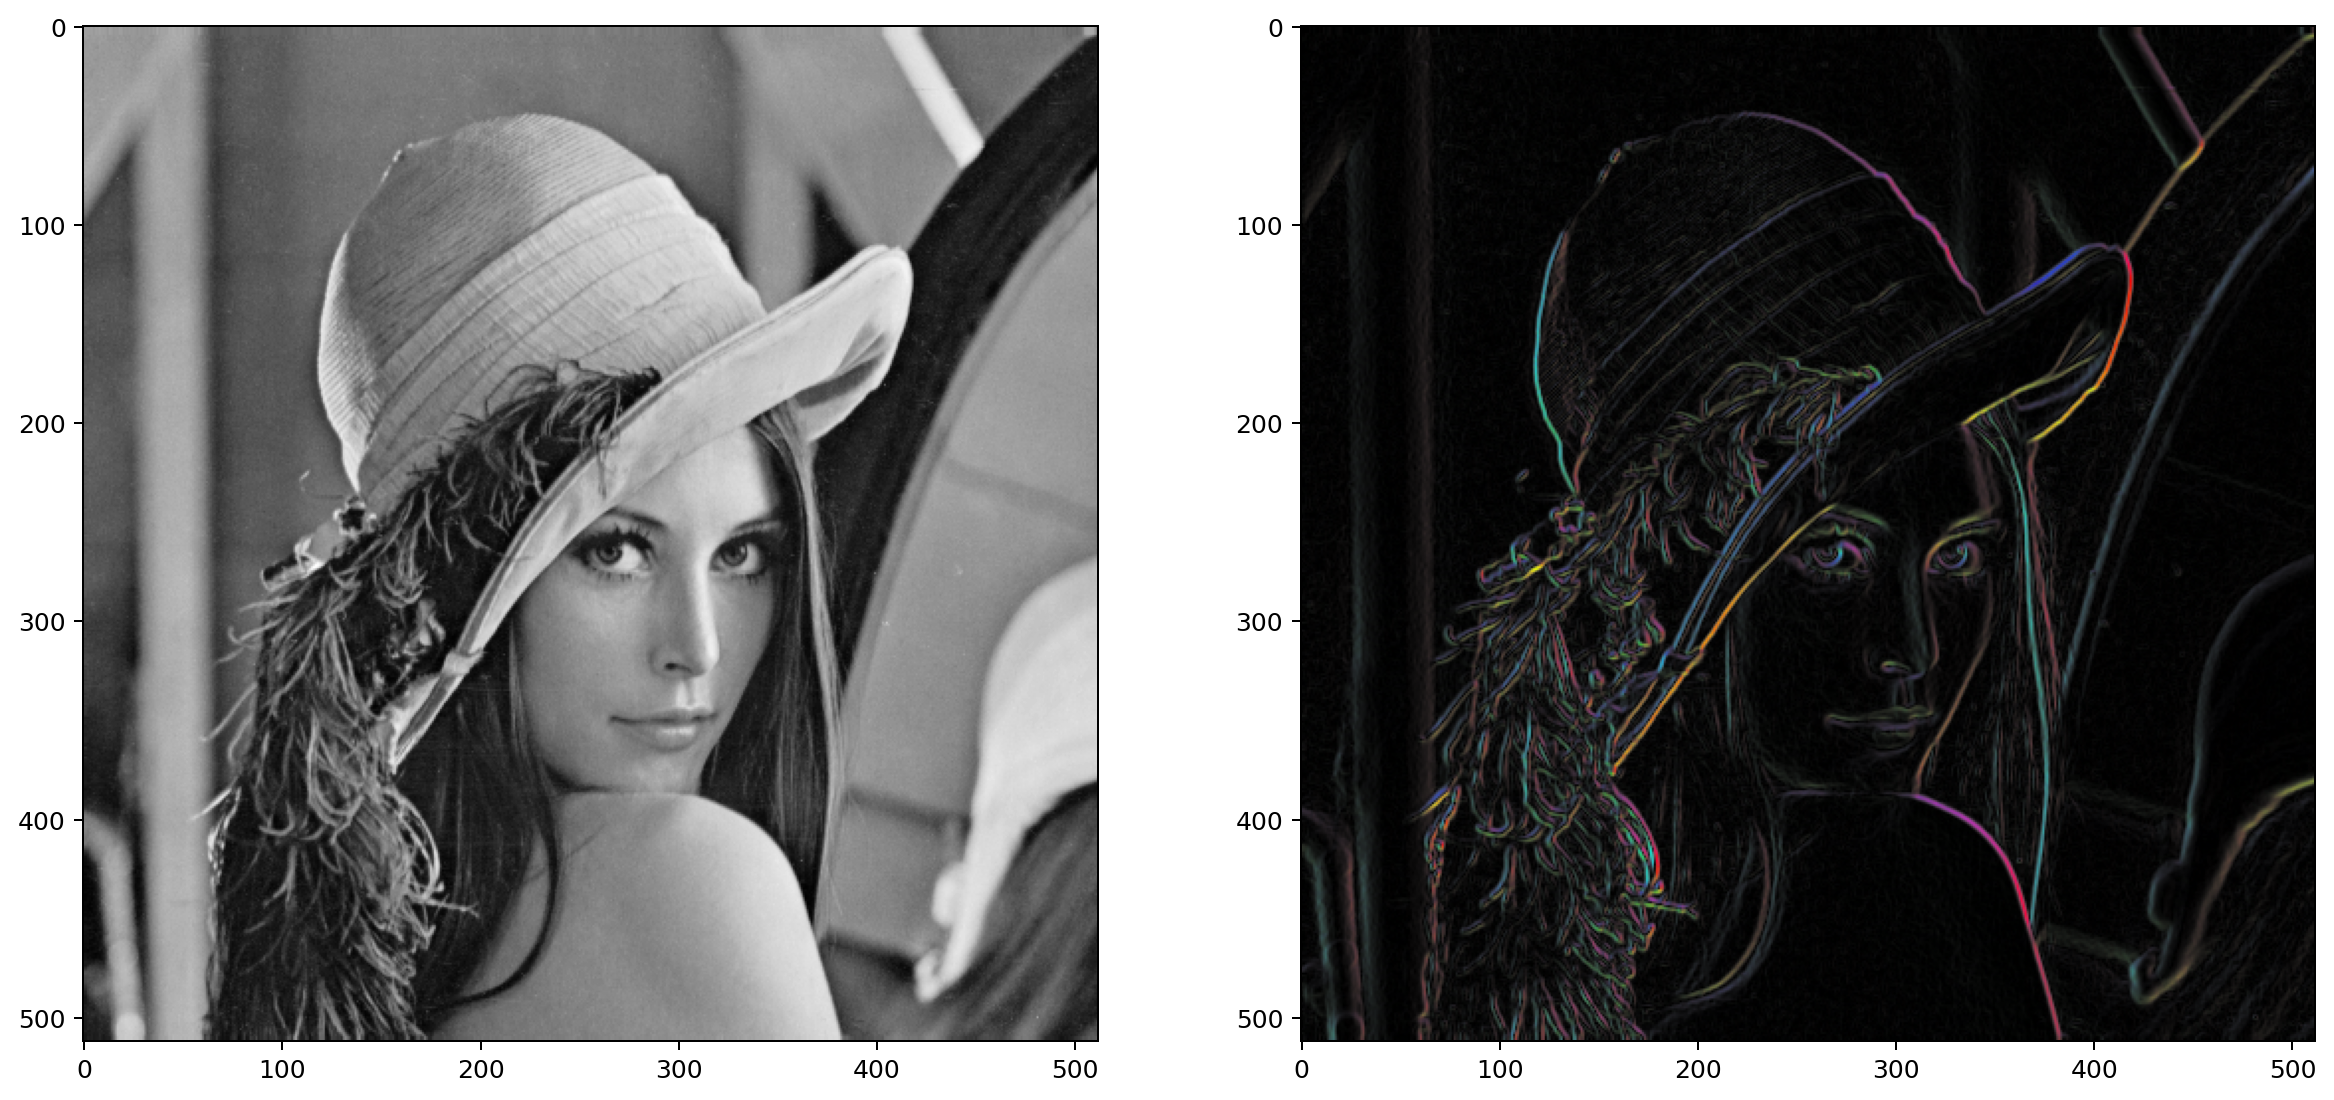

In [17]:
H = np.uint8((theta + np.pi) / (2 * np.pi) * 180)
S = np.uint8(grad / np.max(grad) * 255)
V = np.uint8(grad / np.max(grad) * 255)

theta_hsv = np.stack([H, S, V], axis=-1)
theta_rgb = cv2.cvtColor(theta_hsv, cv2.COLOR_HSV2RGB)

plt.figure(2, figsize=(16, 12), dpi=180)
plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.subplot(122)
plt.imshow(theta_rgb, cmap='gray');